<a href="https://colab.research.google.com/github/meghanair02/Seven7code-Tech/blob/main/TASK_3_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


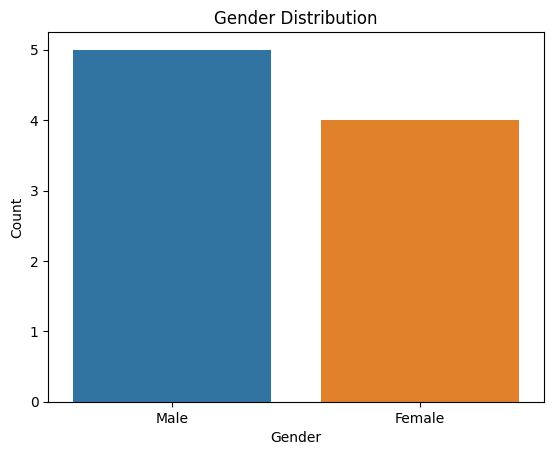

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a sample DataFrame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    # ... other columns ...
}
df = pd.DataFrame(data)

# Using Seaborn's countplot to visualize the counts of different genders
sns.countplot(data=df, x='Gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


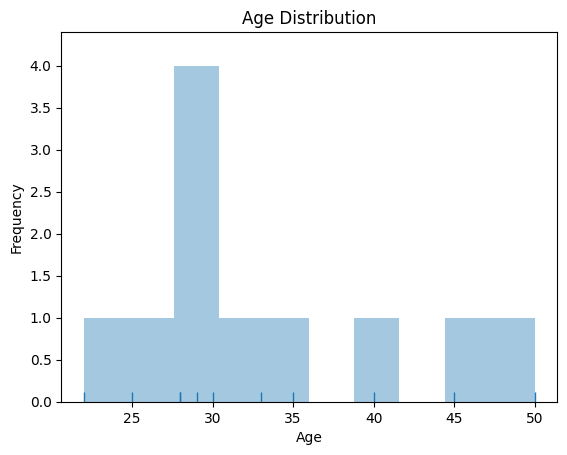

In [ ]:
data = {
    'Age': [25, 30, 40, 22, 35, 28, 45, 33, 28, 29, 50],
}
df = pd.DataFrame(data)

sns.distplot(df['Age'], bins=10, kde=False, rug=True)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


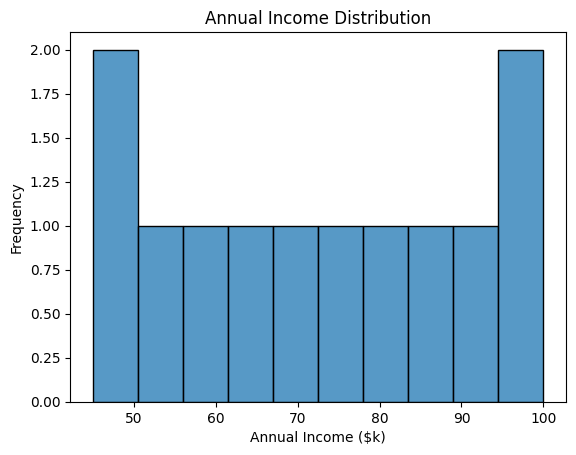

In [ ]:
data = {
    'Annual Income (k$)': [45, 60, 50, 80, 70, 90, 65, 75, 85, 55, 100, 95],
}
df = pd.DataFrame(data)

sns.histplot(data=df, x='Annual Income (k$)', bins=10, kde=False)

plt.xlabel('Annual Income ($k)')
plt.ylabel('Frequency')
plt.title('Annual Income Distribution')
plt.show()


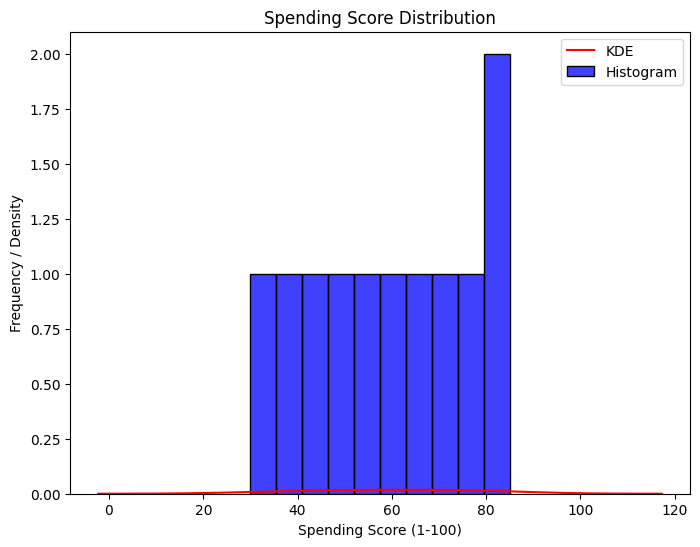

In [ ]:
data = {
    'Spending Score (1-100)': [65, 40, 80, 75, 50, 60, 85, 70, 30, 45, 55],
}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x='Spending Score (1-100)', bins=10, kde=False, color='blue', label='Histogram')
sns.kdeplot(data=df, x='Spending Score (1-100)', color='red', label='KDE')

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency / Density')
plt.title('Spending Score Distribution')
plt.legend()
plt.show()


<Axes: >

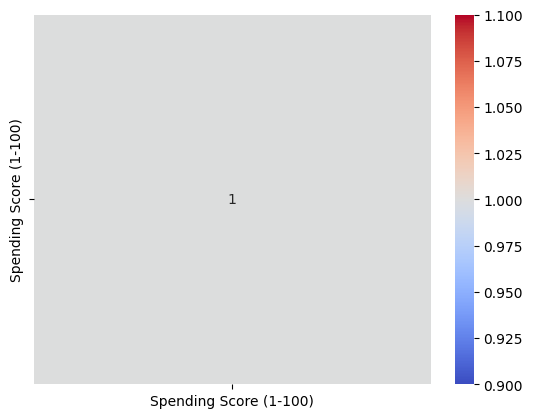

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head()


,Gender
0,Male
1,Female
2,Male
3,Female


In [ ]:
df = pd.DataFrame({'Annual Income (k$)': [100, 200, 300, 400],
                   'Spending Score (1-100)': [50, 60, 70, 80]})

df = df.assign(**{
    'Annual Income (k$)': 0,
    'Spending Score (1-100)': 0
})

df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print(df1.head())


   Annual Income (k$)  Spending Score (1-100)
0                   0                       0
1                   0                       0
2                   0                       0
3                   0                       0


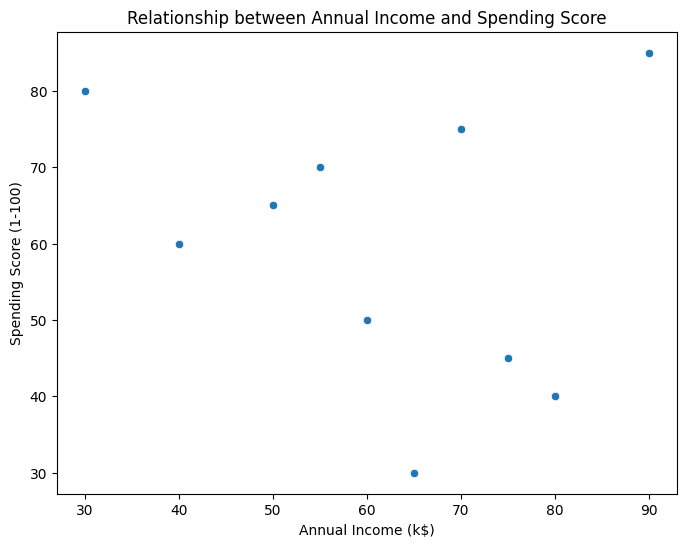

In [ ]:
data = {
    'Annual Income (k$)': [50, 80, 30, 70, 60, 40, 90, 55, 65, 75],
    'Spending Score (1-100)': [65, 40, 80, 75, 50, 60, 85, 70, 30, 45],
}
df1 = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Annual Income and Spending Score')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

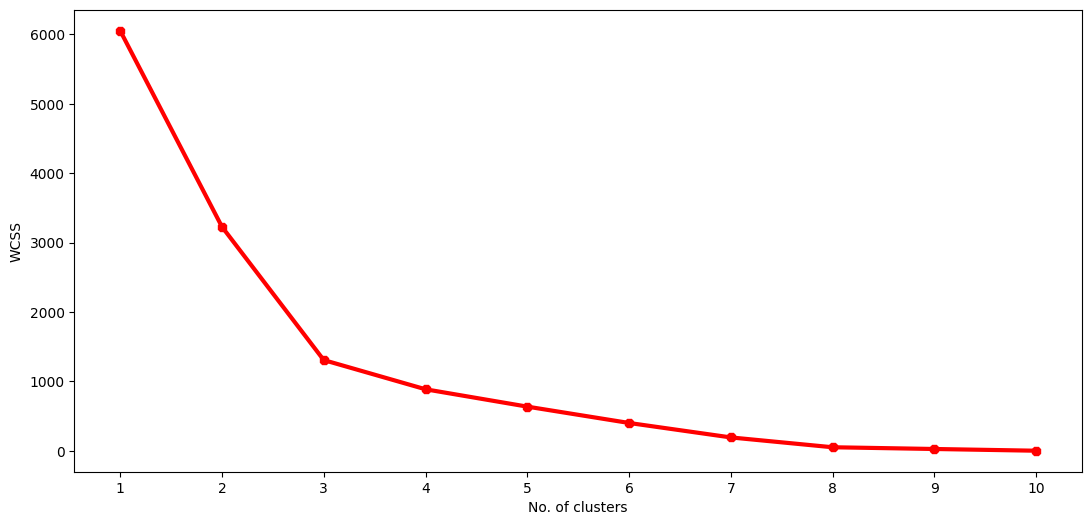

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,50,65,0
1,80,40,1
2,30,80,3
3,70,75,4
4,60,50,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

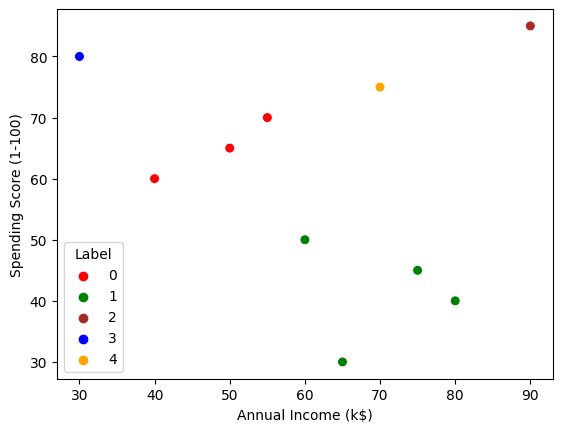

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])


In [ ]:
import pandas as pd

df = pd.DataFrame({'Annual Income (k$)': [100, 200, 300, 400],
                   'Spending Score (1-100)': [50, 60, 70, 80]})

df = df.assign(**{'Age': [20, 30, 40, 50]})

df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

df2.head()


,Annual Income (k$),Spending Score (1-100),Age
0,100,50,20
1,200,60,30
2,300,70,40
3,400,80,50


In [ ]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

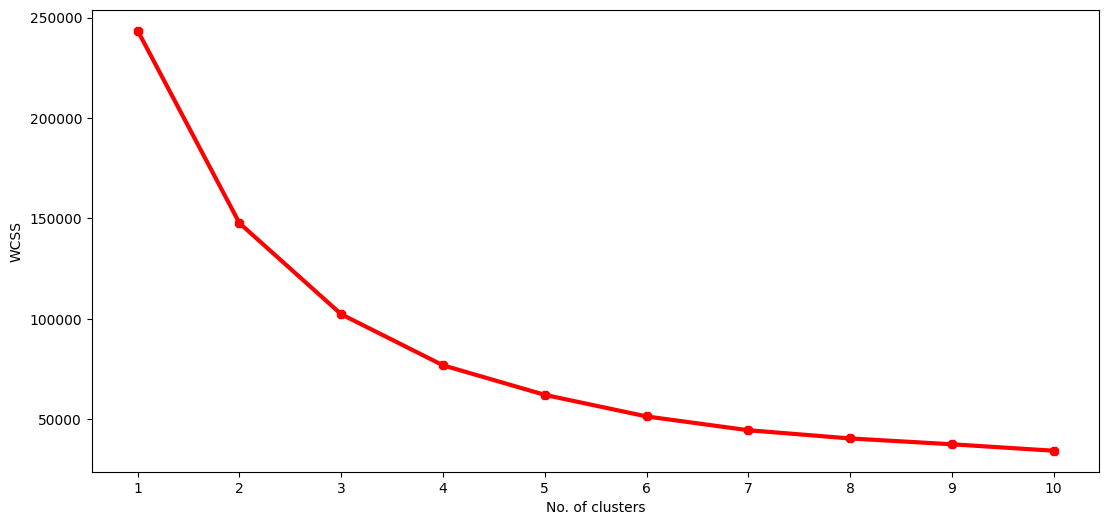

In [ ]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()


,Age,Annual Income (k$),Spending Score (1-100),Label
0,43,90,15,2
1,56,143,3,2
2,40,54,90,3
3,32,117,13,2
4,59,143,47,1


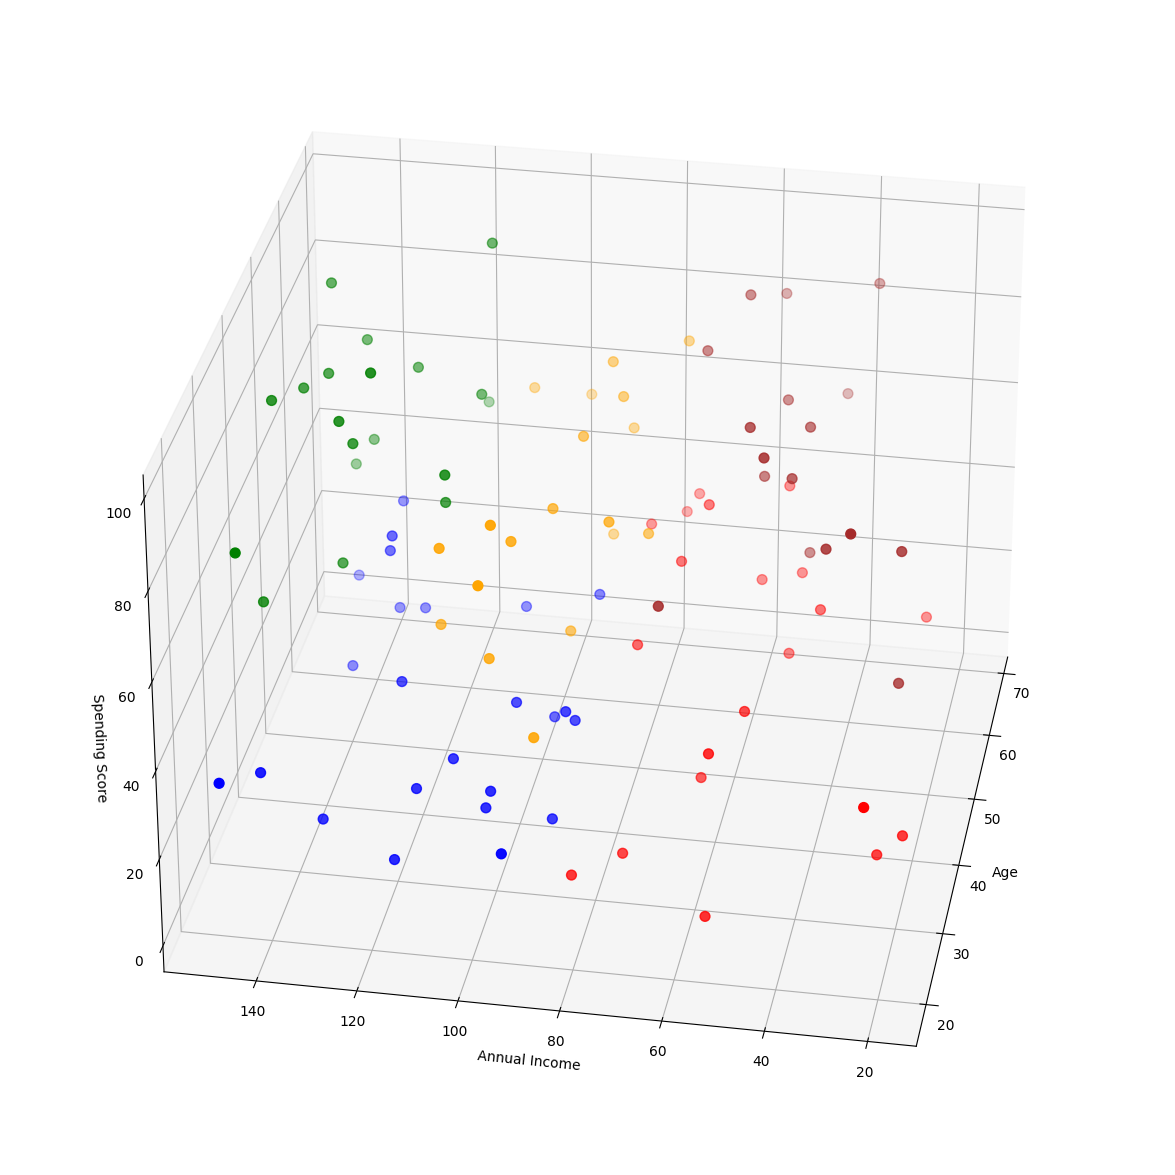

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)

ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)

ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)

ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)

ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)

ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()
